In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv('sales.csv')

In [3]:
conn = sqlite3.connect('salesdata.db')

In [4]:
sales_df.to_sql('sales', conn, index=False, if_exists='replace')

1000

In [10]:
# Total Quantity and Revenue by Product

query = '''
SELECT
    product_category,
    SUM(quantity) AS totalqty,
    SUM(quantity * amount) AS revenue
FROM sales
GROUP BY product_category
'''

In [11]:
result_df = pd.read_sql_query(query, conn)

In [12]:
print(result_df)

  product_category  totalqty  revenue
0           Beauty       771   426855
1         Clothing       894   476320
2      Electronics       849   480025


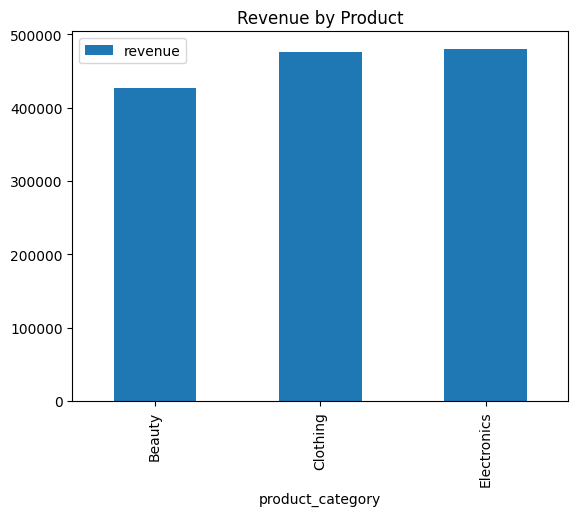

In [13]:
result_df.plot(kind = 'bar', x = 'product_category', y = 'revenue', title = 'Revenue by Product')
plt.savefig('saleschart.png')
plt.show()

In [15]:
# Top 3 Products by Revenue

query_top3 = '''
SELECT
    product_category,
    SUM(quantity * amount) AS revenue
FROM sales
GROUP BY product_category
ORDER BY revenue DESC
LIMIT 3
'''

In [16]:
df_top3 = pd.read_sql_query(query_top3, conn)
print(df_top3)

  product_category  revenue
0      Electronics   480025
1         Clothing   476320
2           Beauty   426855


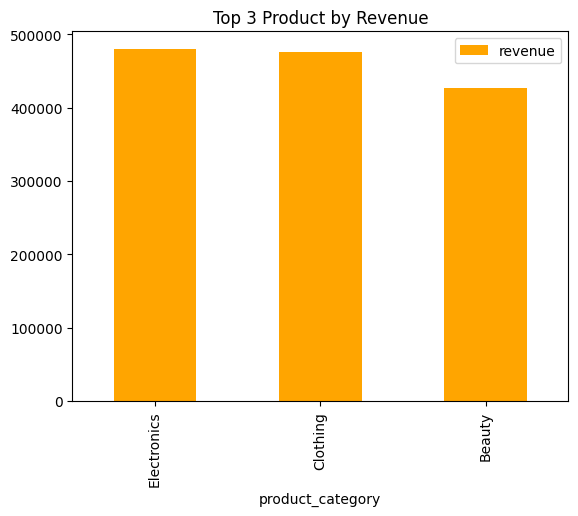

In [19]:
df_top3.plot(kind = 'bar', x = 'product_category', y = 'revenue', title = 'Top 3 Product by Revenue', color = 'orange')
plt.savefig('top3_revenue_chart.png')
plt.show()

In [20]:
# Average Price per Product

query_avg_price = '''
SELECT
    product_category,
    AVG(amount) AS avg_price
FROM sales
GROUP BY product_category
'''

  product_category   avg_price
0           Beauty  467.475570
1         Clothing  443.247863
2      Electronics  458.786550


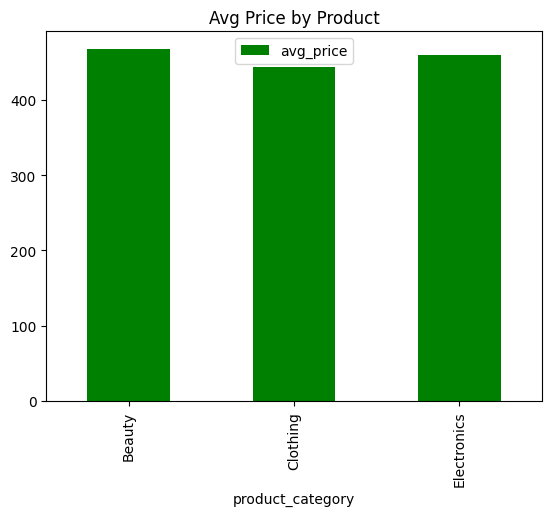

In [23]:
df_avg_price = pd.read_sql_query(query_avg_price, conn)
print(df_avg_price)
df_avg_price.plot(kind = 'bar', x = 'product_category', y = 'avg_price', title = 'Avg Price by Product', color = 'green')
plt.savefig('avg_price_chart.png')
plt.show()

In [24]:
# Total Quantity Overall

query_total_quantity = '''
SELECT
    SUM(quantity) AS total_quantity
FROM sales
'''

In [25]:
df_total_quantity = pd.read_sql_query(query_total_quantity, conn)
print("Total Quantity Sold:", df_total_quantity['total_quantity'][0])

Total Quantity Sold: 2514


In [26]:
# Closing Connection

conn.close()